In [ ]:
import torch
from torch  import nn
import matplotlib.pyplot as plt
torch.__version__

'2.0.1+cu118'

In [ ]:
#1. DATA: Preparing and loading

# Data can be anything

# *Excel spreadsheets
# *Images of any kind
# *Videos
# *Audios
# *DNA
# *Text

In [ ]:
weight = 0.5
bias = 0.2

start = 0
end = 1
step = 0.04
X = torch.arange(start,end,step)
y = weight*X + bias

len(X), len(y)

(25, 25)

In [ ]:
# Splitiing data in training and test sets
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(20, 20, 5, 5)

In [ ]:
# Visualize these numbers
#  Function for it

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots traininig data, test data and compares predictions
  """
  plt.figure(figsize=(11,8))

  # plot training data in red
  plt.scatter(train_data,train_labels,c='red',s=3,label="Training Data")
  # plot testing data in blue
  plt.scatter(test_data,test_labels,c='blue',s=3,label="Testing Data")

  # Are there any predictions?
  if predictions is not None:
    #Plot if they exist
    plt.scatter(test_data,predictions,c='black',s=3,label="Predictions")

  #Show legend
  plt.legend(prop={"size":14});





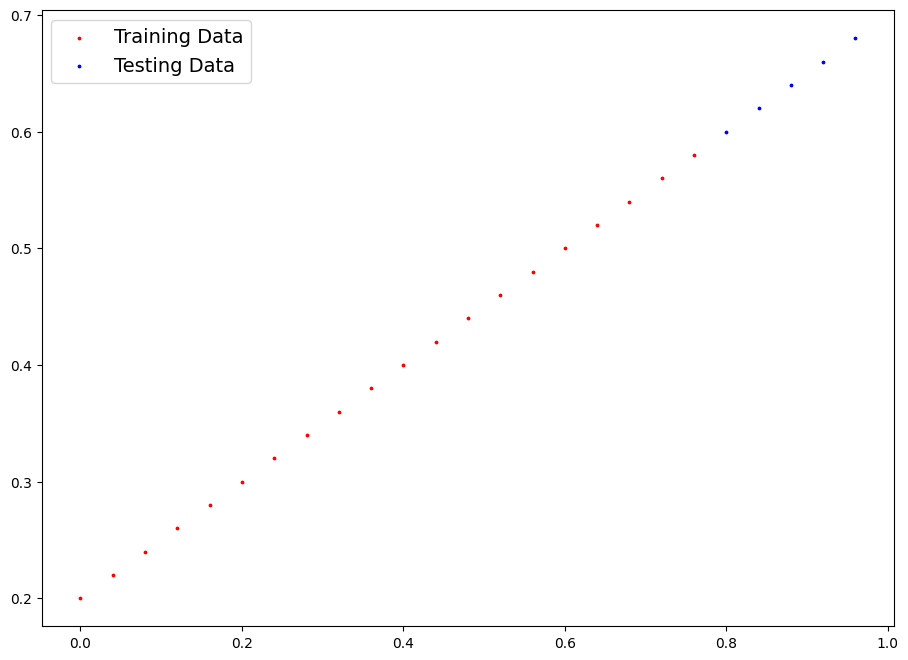

In [ ]:
plot_predictions();
# we cant see predictions adnwe do not have them yet set to none

In [ ]:
#2. Building ourfirst pytorch model
from torch import nn
# Linear regression model class
# Y= mX + b
# Almost everytihng in pytorch ingherits from nn.module

    #Start with random parameters and update the parameters with forward pass based on the traininig data to get ideal values of (weights and biases) with the help of the followiing algorithms.
    # It uses 2 algorithms
    # 1. Gradient descent
    # 2.Back propogation

class LinearRegressionModel(nn.Module): #subclass nn.module
  #contructor
  def __init__(self):
    super().__init__()

    #inintialize model parameters to be used in various computations. CREATING VARIABLES FOR OUR MODEL.
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,#this is by default true
                                           dtype=torch.float))# pytorch loves dtype = float 32
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,#this is by default true
                                        dtype=torch.float))# pytorch loves dtype = float 32

    # Forward method to define the computation in the model
    # Any class of nn module needs a forward method which defines the forward computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input of the model
    return self.weights*x + self.bias




### PyTorch model building essentials

PyTorch has four (give or take) essential modules you can use to create almost any kind of neural network you can imagine.

They are [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html). For now, we'll focus on the first two and get to the other two later (though you may be able to guess what they do).

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via [**gradient descent**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html))  are calculated automatically, this is often referred to as "autograd".  |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). |

If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from `torch.nn`,
* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make `nn.Module`(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within  `nn.Module`(s)
* `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

In [ ]:
# Checking the pytorch model's insides
# we can check models parameters using .parameters()

In [ ]:
# create torch maunal seed
torch.manual_seed(42)

# creating an instance of a model
model_0 = LinearRegressionModel()

# we can check models parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.5, 0.2)

In [ ]:
### Making prediction using `torch.inference_mode()`

# To test our models predictive power lets test how well it works and predicts y_test based on X_test.
# If we pass our data through the model it will pass it through the forward method.

# Make predictions with model.

#### Inference mode turns off gradient tracking during training which means it keeps track of less data(memory) and predictions are given quicker.
with torch.inference_mode():
  y_pred = model_0(X_test)

# Method 2: similar to above but inference mode preffered
# with torch.no_grad():
#   y_pred = model_0(X_test)

y_pred

tensor([0.3982, 0.4116, 0.4251, 0.4386, 0.4520])

In [ ]:
y_test

tensor([0.6000, 0.6200, 0.6400, 0.6600, 0.6800])

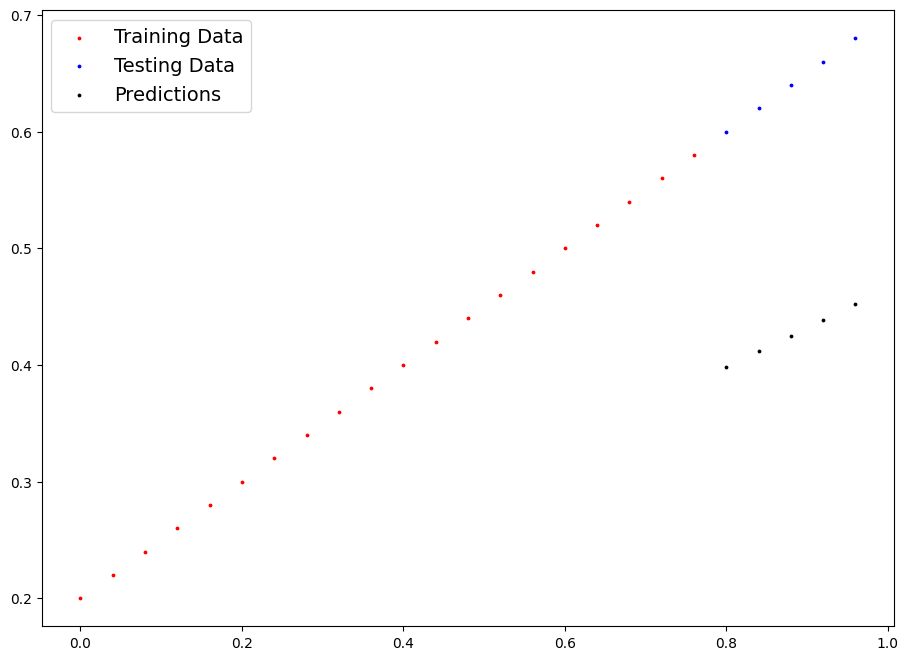

In [ ]:
plot_predictions(predictions=y_pred)

In [ ]:
### 3. Training Model

# The whole idea of training is for a model to move form some *unknown* params(these may be random) to some known params.
# Or from a poor representation of the data to a better representation of data

# One way to measure how poor you models predictions are to create a loss fn or cost fn or criterion.


### Creating a loss function and optimizer in PyTorch

For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a **loss function** as well as an **optimizer**.

The rolls of these are:

| Function | What does it do? | Where does it live in PyTorch? | Common values |
| ----- | ----- | ----- | ----- |
| **Loss function** | Measures how wrong your models predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions). | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).  |
| **Optimizer** | Tells your model how to update its internal parameters to best lower the loss. | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

Let's create a loss function and an optimizer we can use to help improve our model.

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

For our problem, since we're predicting a number, let's use MAE (which is under `torch.nn.L1Loss()`) in PyTorch as our loss function.

![what MAE loss looks like for our plot data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*Mean absolute error (MAE, in PyTorch: `torch.nn.L1Loss`) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.*

And we'll use SGD, `torch.optim.SGD(params, lr)` where:

* `params` is the target model parameters you'd like to optimize (e.g. the `weights` and `bias` values we randomly set before).
* `lr` is the **learning rate** you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a **hyperparameter** (because it's set by a machine learning engineer). Common starting values for the learning rate are `0.01`, `0.001`, `0.0001`, however, these can also be adjusted over time (this is called [learning rate scheduling](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
## We need
#1.Training loop
#2.Testing loop

In [ ]:
##### Stochastic gradient descent is Random gradient descent
#  It randomly adjusts the values to minimize loss fn as it is an optimizer changes the weight and bisas to the point where it does not imporove the loss

#setting a loss fn
loss_fn = nn.L1Loss()  # MAE loss is same as L1Loss

#setting an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

# if we change lr to a higher value it will change the params by a lot in opne hit
# eg.lr of 0.1 will change the weight from say 0.3367 to 0.4367

In [ ]:
### Building a training loop

# Step 0 - Loop through the data
# step_1 - Forward pass(this involves the data moving through our model's `forward()` functions . also knowm as forward propogation
# step_2 - Calculate the loss (compare forward pass predictions to the groung truth labels)
# step_3 - Optimizer zero grad
# step_4 - Loss backward - move backwards through the network to calculate the gradients of each of the prameters of our models wrt the loss (**Backpropogation**)
# step_5 - Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.(**gradient descent**)

# gradient is a slope . Move model parametrs till the gradients of the loss = zero -> loss = 0

In [ ]:
X_test, y_test

(tensor([0.8000, 0.8400, 0.8800, 0.9200, 0.9600]),
 tensor([0.6000, 0.6200, 0.6400, 0.6600, 0.6800]))

In [ ]:
# An epoch is one loop through the data
epochs = 100

#TRACKING different values
epoch_count = []
loss_values = []
test_loss_values = []
### TRAINING LOOP

# Step 0 - Loop through the data

for epoch in range(epochs):
  # set model to trainingt mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients


  # step_1 - Forward pass
  y_pred = model_0(X_train)

  # step_2 - Calculate the loss
  loss = loss_fn(y_pred,y_train)

  # step_3 - Optimizer zero grad - if we dont zero the step of the optimizer, it is something to do with the efficiency of computing.
  optimizer.zero_grad()

  # step_4 - Loss backward - perform back prop on loss wrt parameters of the model
  loss.backward()

  # step_5 - Optimizer step(perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so... we have to zero the for the next iteration of the loop.


  ### TESTING
  model_0.eval() # turns off gradient tracking. Turns off different settings which are not needed for evaluation/testing(dropout/batch norm layers)

  with torch.inference_mode():
  # usually pytorch will keep track of everything(gradients and what not)
  #inference mode shuts down gradient tracking and a couple of more things behind the scenes.
    # 1.Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

# print out whats happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss : {test_loss}")
    #print the model's state dict
    print(model_0.state_dict())






Epoch:0 | Loss:0.1332482546567917 | Test Loss : 0.20155909657478333
OrderedDict([('weights', tensor([0.3405])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss:0.03129573538899422 | Test Loss : 0.07971739768981934
OrderedDict([('weights', tensor([0.3778])), ('bias', tensor([0.2278]))])
Epoch:20 | Loss:0.02005392126739025 | Test Loss : 0.04666781425476074
OrderedDict([('weights', tensor([0.4017])), ('bias', tensor([0.2398]))])
Epoch:30 | Loss:0.01660807803273201 | Test Loss : 0.0385318398475647
OrderedDict([('weights', tensor([0.4189])), ('bias', tensor([0.2328]))])
Epoch:40 | Loss:0.013156086206436157 | Test Loss : 0.030395876616239548
OrderedDict([('weights', tensor([0.4361])), ('bias', tensor([0.2258]))])
Epoch:50 | Loss:0.009704084135591984 | Test Loss : 0.022259866818785667
OrderedDict([('weights', tensor([0.4533])), ('bias', tensor([0.2188]))])
Epoch:60 | Loss:0.006252078805118799 | Test Loss : 0.014123904518783092
OrderedDict([('weights', tensor([0.4705])), ('bias', tensor([0.2118])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4894])), ('bias', tensor([0.1978]))])

In [ ]:
weight, bias # IDEAL PARAMETERS

(0.5, 0.2)

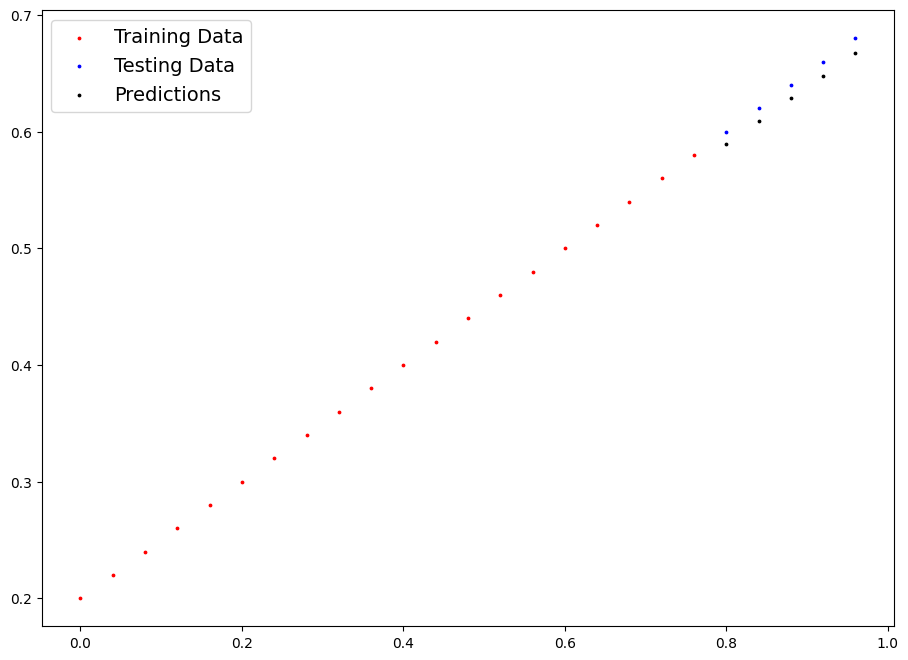

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

plot_predictions(predictions=y_pred_new)

In [ ]:
loss_values, test_loss_values

([tensor(0.1332, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0201, grad_fn=<MeanBackward0>),
  tensor(0.0166, grad_fn=<MeanBackward0>),
  tensor(0.0132, grad_fn=<MeanBackward0>),
  tensor(0.0097, grad_fn=<MeanBackward0>),
  tensor(0.0063, grad_fn=<MeanBackward0>),
  tensor(0.0029, grad_fn=<MeanBackward0>),
  tensor(0.0062, grad_fn=<MeanBackward0>),
  tensor(0.0062, grad_fn=<MeanBackward0>)],
 [tensor(0.2016),
  tensor(0.0797),
  tensor(0.0467),
  tensor(0.0385),
  tensor(0.0304),
  tensor(0.0223),
  tensor(0.0141),
  tensor(0.0047),
  tensor(0.0018),
  tensor(0.0018)])

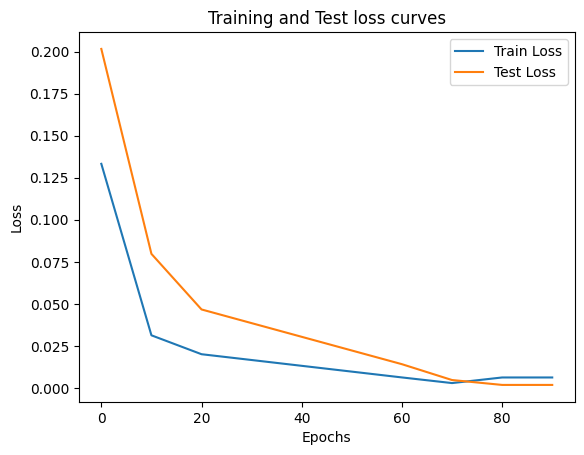

In [ ]:
import numpy as np

# plot loss curves
# tensor to numpy for plotting for loss values
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


## 5. Saving and loading a PyTorch model

If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? |
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.  |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. |

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.


In [ ]:
### saving a model

# 1.torch.save() - allows you to save a pytorch object in python's pickle format
# 2.torch.load() - allows you to laod a pytorch object
# 3.torch.nn.Module.load_state_dict() allows you to load a model's saved state dictionary

from pathlib import Path

# 1.Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.Create model save path
MODEL_NAME ="01_Rishi_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 2. Save the model state dict

print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)




Saving model to:models/01_Rishi_pytorch_workflow_model_0.pth


### Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth` we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the *entire* model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).

Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation (italics mine):

> The disadvantage of this approach *(saving the whole model)* is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...
>
> Because of this, your code can break in various ways when used in other projects or after refactors.

So instead, we're using the flexible method of saving and loading just the `state_dict()`, which again is basically a dictionary of model parameters.

Let's test it out by created another instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dict()`.

In [ ]:
### Loading the model
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.4894])), ('bias', tensor([0.1978]))])

In [ ]:
### Check the loaded version to make predictions

# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
loaded_model_preds == y_pred_new

tensor([True, True, True, True, True])

## 6.ALL IN ONE


## 6. Putting it all together

We've covered a fair bit of ground so far.

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together.

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.

> **Note:** If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Now let's start making our code device agnostic by setting `device="cuda"` if it's available, otherwise it'll default to `device="cpu"`.


In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

Let's create some data just like before.

First, we'll hard-code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our `X` values.

Finally, we'll use the `X` values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * X + bias`).


In [ ]:
####### ALL IN ONE #################################

# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now we've got some data, let's split it into training and test sets.

We'll use an 80/20 split with 80% training data and 20% testing data.

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

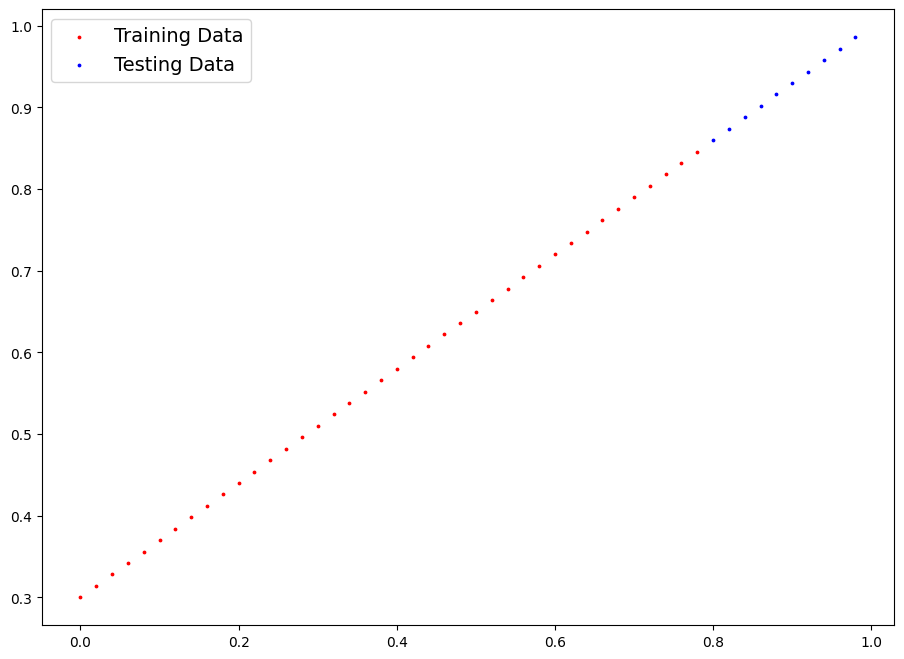

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

We've got some data, now it's time to make a model.

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using `nn.Parameter()`, we'll use [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to do it for us.

Where `in_features` is the number of dimensions your input data has and `out_features` is the number of dimensions you'd like it to be output to.

In our case, both of these are `1` since our data has `1` input feature (`X`) per label (`y`).

![comparison of nn.Parameter Linear Regression model and nn.Linear Linear Regression model](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*Creating a linear regression model using `nn.Parameter` versus using `nn.Linear`. There are plenty more examples of where the `torch.nn` module has pre-built computations, including many popular and useful neural network layers.*


In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Notice the outputs of `model_1.state_dict()`, the `nn.Linear()` layer created a random `weight` and `bias` parameter for us.

Now let's put our model on the GPU (if it's available).

We can change the device our PyTorch objects are on using `.to(device)`.

First let's check the model's current device.

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

Time to build a training and testing loop.

First we'll need a loss function and an optimizer.

Let's use the same functions we used earlier, `nn.L1Loss()` and `torch.optim.SGD()`.

We'll have to pass the new model's parameters (`model.parameters()`) to the optimizer for it to adjust them during training.

The learning rate of `0.01` worked well before too so let's use that again.




In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

loss function and optimizer ready, now let's train and evaluate our model using a training and testing loop.

The only different thing we'll be doing in this step compared to the previous training loop is putting the data on the target `device`.

We've already put our model on the target `device` using `model_1.to(device)`.

And we can do the same with the data.

That way if the model is on the GPU, the data is on the GPU (and vice versa).

Let's step things up a notch this time and set `epochs=1000`.

If you need a reminder of the PyTorch training loop steps, see below.

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


> **Note:** Due to the random nature of machine learning, you will likely get slightly different results (different loss and prediction values) depending on whether your model was trained on CPU or GPU. This is true even if you use the same random seed on either device. If the difference is large, you may want to look for errors, however, if it is small (ideally it is), you can ignore it.

Nice! That loss looks pretty low.

Let's check the parameters our model has learned and compare them to the original parameters we hard-coded.

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Remember though, in practice, it's rare that you'll know the perfect parameters ahead of time.

And if you knew the parameters your model had to learn ahead of time, what would be the fun of machine learning?

Plus, in many real-world machine learning problems, the number of parameters can well exceed tens of millions.

I don't know about you but I'd rather write code for a computer to figure those out rather than doing it by hand.

### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

If you're making predictions with data on the GPU, you might notice the output of the above has `device='cuda:0'` towards the end. That means the data is on CUDA device 0 (the first GPU your system has access to due to zero-indexing), if you end up using multiple GPUs in the future, this number may be higher.

Now let's plot our model's predictions.

> **Note:** Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU. So you might run into some issues when trying to use a function from one of these libraries with tensor data not stored on the CPU. To fix this, you can call [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) on your target tensor to return a copy of your target tensor on the CPU.

ValueError: ignored

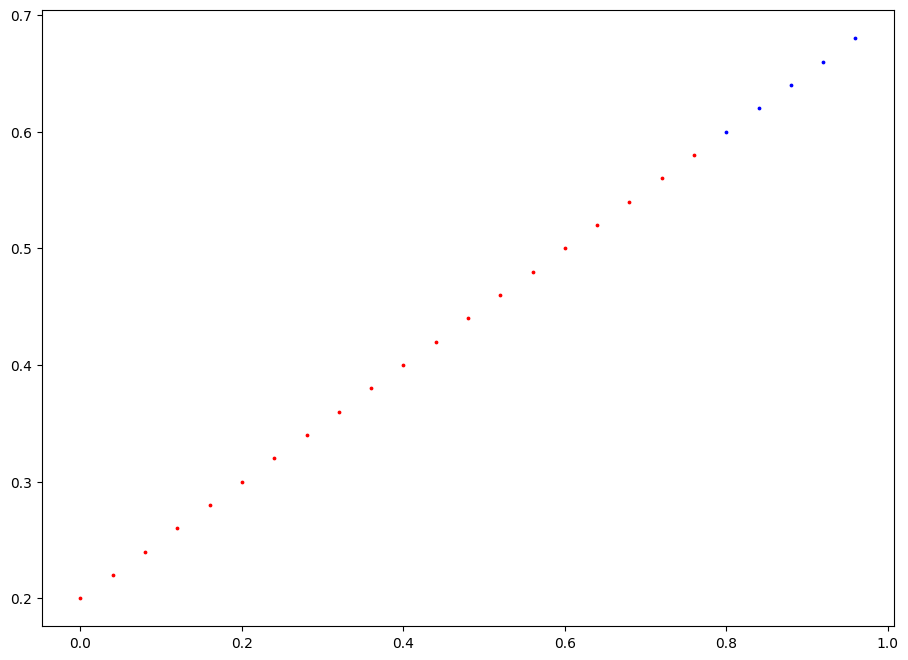

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a model

We're happy with our models predictions, so let's save it to file so it can be used later.



In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_Rishi_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_Rishi_pytorch_workflow_model_1.pth


And just to make sure everything worked well, let's load it back in.

We'll:
* Create a new instance of the `LinearRegressionModelV2()` class
* Load in the model state dict using `torch.nn.Module.load_state_dict()`
* Send the new instance of the model to the target device (to ensure our code is device-agnostic)

In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])